<h1><center> BBM469 - Data Intensive Applications Labratory </center></h1>

<h2><center> Assignment - 2 </center></h2>

<h4><center>Clustering and Classification with Python</center></h4>

<b>Author:</b> Ali Baran Tasdemir - 21627653

In this assignment we try to apply methods like clustering and classification. This assignment aims to diagnosing breast cancer using the machine learning methods from the features gathered by images of the breast cells. The data labeled as M (malignant) or B (benign). 

In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h3> Dataset First Look and Preprocess</h3>

Information of columns

- id: ID number

- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

- radius_mean: mean of distances from center to points on the perimeter

- texture_mean: standard deviation of gray-scale values

- perimeter_mean: mean size of the core tumor

- area_mean

- smoothness_mean: mean of local variation in radius lengths

- compactness_mean: mean of perimeter^2 / area - 1.0

- concavity_mean: mean of severity of concave portions of the contour

- concave points_mean: mean for number of concave portions of the contour

- symmetry_mean

- fractal_dimension_mean: mean for "coastline approximation" - 1

- radius_se: standard error for the mean of distances from center to points on the perimeter

- texture_se: standard error for standard deviation of gray-scale values

- perimeter_se

- area_se

- smoothness_se: standard error for local variation in radius lengths

- compactness_se: standard error for perimeter^2 / area - 1.0

- concavity_se: standard error for severity of concave portions of the contour

- concave points_se: standard error for number of concave portions of the contour

- symmetry_se

- fractal_dimension_se: standard error for "coastline approximation" - 1

- radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

- texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

- perimeter_worst

- area_worst

- smoothness_worst: "worst" or largest mean value for local variation in radius lengths

- compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

- concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

- concave points_worst: "worst" or largest mean value for number of concave portions of the contour

- symmetry_worst

- fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [41]:
df = pd.read_csv('Data/data.csv')
df.shape

(569, 33)

In [42]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 33 columns (features) in the dataset. With the knowledge we get from column descriptions, "id" column has no meaning over objective. So, in total we have 32 columns. Only "diagnosis" column is a string. Other columns are numerical. 

"Diagnosis" column is the target value. It can be M (Malignant) or B (Benign). It is binary so we can encode this column as 1 (M) and 0 (B).

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

As we see below only a column named "Unnamed: 32" has 569 null values. This means all of the values are null so we can drop entire column.
Also "id" column has no meaning over the objective. So we can drop that column too.

In [44]:
# First of all we need to find that how many features is null
df.shape[0] - (df.shape[0] - df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [45]:
df = df.drop(['id', 'Unnamed: 32'],axis = 1)

In [46]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target column (diagnosis) has two different values, B and M. So we will encode them as (B = 0) and (M = 1).

In [47]:
mask = {
    'B': 0,
    'M': 1
}
df['diagnosis'] = df['diagnosis'].map(mask)

Our dataset is clean and ready to use. We can save the clean dataset to create a checkpoint.

In [50]:
df.to_csv('Data/data_clean.csv')

### Normalized Dataset

We will create another dataset. The difference is, we will normalize the features on this dataset.

In [87]:
scaler = MinMaxScaler()

df_n = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_n.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Exploratory Data Analysis (EDA)

We will check some features and try to understand dataset better.

We split the features and the target value. X for features, y for target value

In [88]:
y = df.diagnosis
X = df_n.drop(['diagnosis'],axis = 1 )

Firstly we will check how is our data distributed. <i>Remember B = 0, M = 1</i>

Most of the data belongs to benign cells.

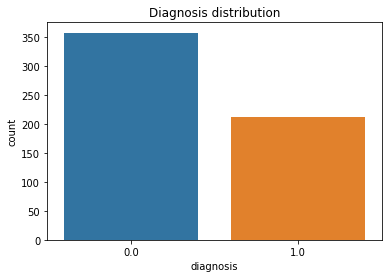

In [89]:
ax = sns.countplot(x='diagnosis', data=df_n)

plt.title("Diagnosis distribution")

plt.show()

In [90]:
df_n.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For an example here we are inspecting first 5 feature. Here is a violin plot. That shows us malignant and benign cells has some distinctions. For our example, malignant cells has more bigger values for these five features.

In [99]:
data_first = pd.concat([y,X.iloc[:,:15]],axis=1)
data_second = pd.concat([y,X.iloc[:,15:]],axis=1)

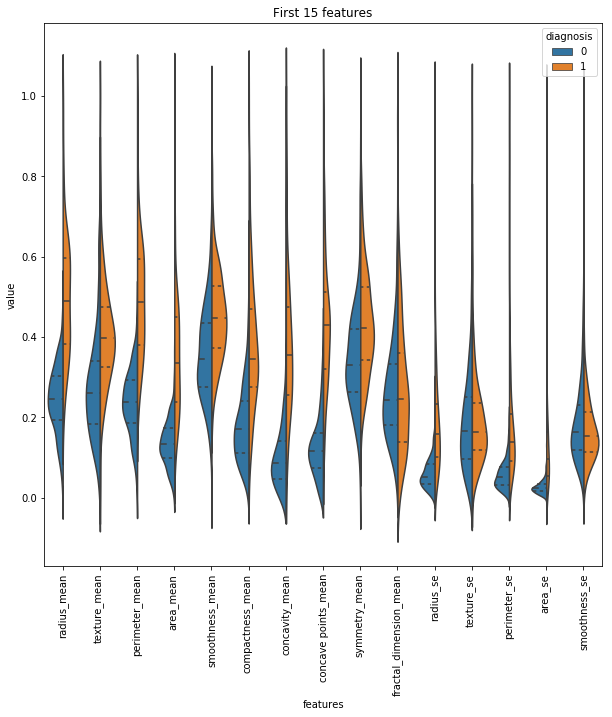

In [102]:
data = pd.melt(data_first,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("First 15 features")
plt.show()

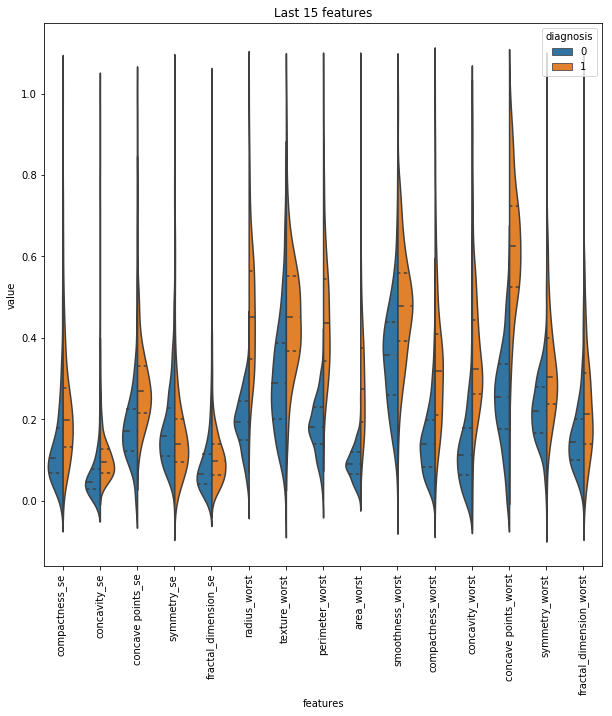

In [103]:
data = pd.melt(data_second,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Last 15 features")
plt.show()

Here is a correlation map that shows how our features correlated with each other. It has a range between -1 and 1. 
- Closer to 1 means, these features has positive correlation,
- 0 means there is no correlation,
- Closer to -1 means, these features has negative correlation

So we can say that features with closer to 1 or -1 has no importance. We can keep only one of them in the feature list.

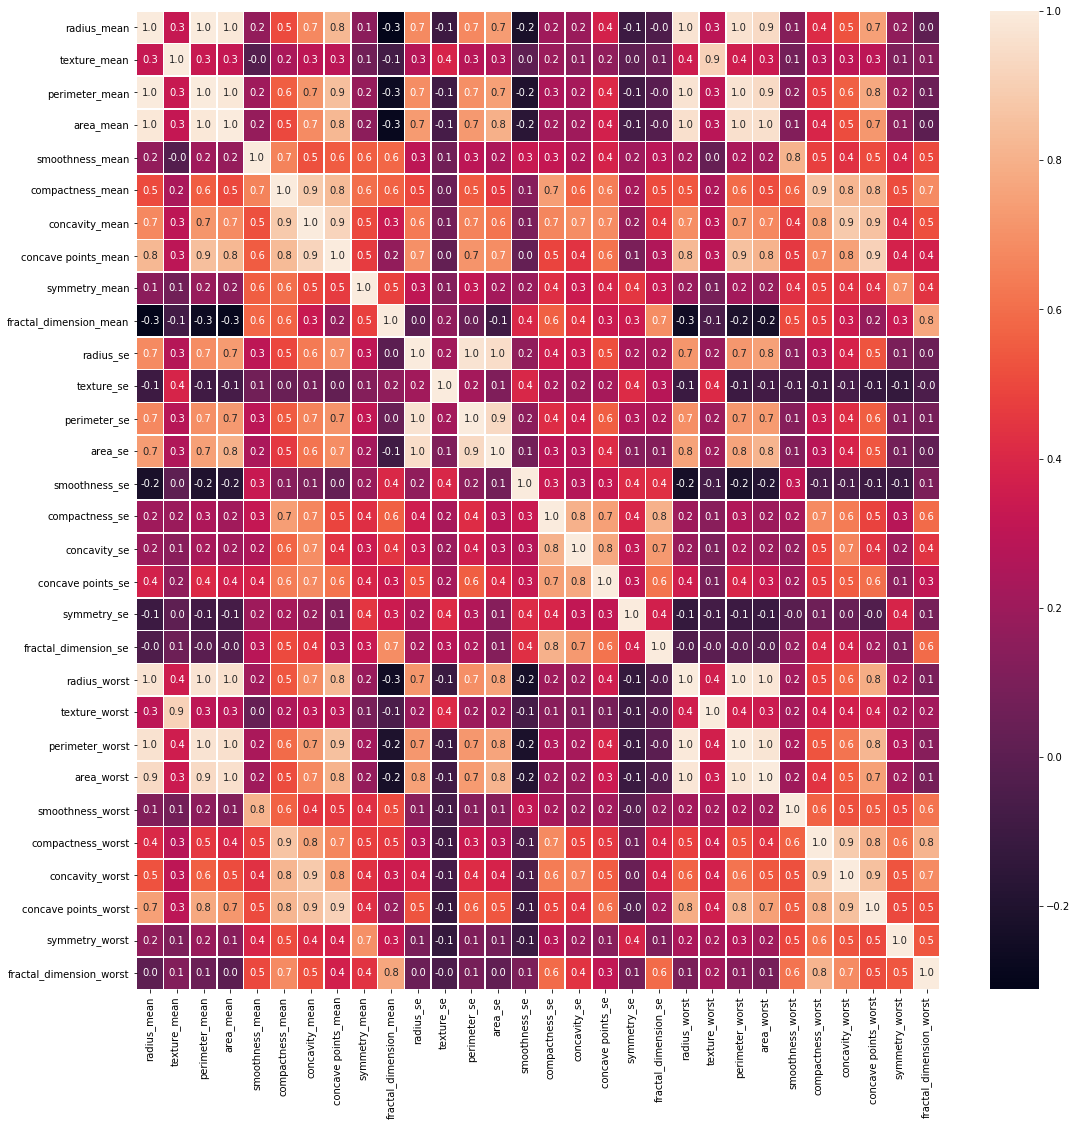

In [105]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In this step we can eliminate some features which are correlated with each other.

- In the bottom left of the correlation matrix, there is a 10x10 square. X axis is features with 'mean' and the y axis is features with 'worst'. If you look this square carefully, you can see there is a diagonal (top-left to bottom-right) with 1 correlation. This means features with 'mean' and 'worst' are positively correlated. So we may consider using only 1 of the features. (For example, check radius_mean and radius_worst)

- radius_mean, area_mean and perimeter_mean are correlated. I will use radius_mean.
- compactness_mean, concavity_mean, concave_points_mean are correlated. I will use compactnes_mean.
- radius_se, area_se and perimeter_se are correlated. I will use radius_se.

So our list of dropping features are:
```python
drop_list = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "area_mean", "perimeter_mean", "concavity_mean", "concave points_mean", "area_se", "perimeter_se"]
```    

At last, after we decided the features we use we can create seperate target and features lists for algorithms. (y = Target, X = features)

In [110]:
drop_list = ["diagnosis", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
             "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", 
             "fractal_dimension_worst", "area_mean", "perimeter_mean", "concavity_mean", "concave points_mean", 
             "area_se", "perimeter_se"]

In [111]:
print("Normalized")
y_n = df_n.diagnosis
X_n = df_n.drop(drop_list,axis = 1)
print("Shape of y: ", y_n.shape)
print("Shape of X: ", X_n.shape)

Normalized
Shape of y:  (569,)
Shape of X:  (569, 14)


In [112]:
print("Normalized")
y = df.diagnosis
X = df.drop(drop_list,axis = 1)
print("Shape of y: ", y.shape)
print("Shape of X: ", X.shape)

Normalized
Shape of y:  (569,)
Shape of X:  (569, 14)


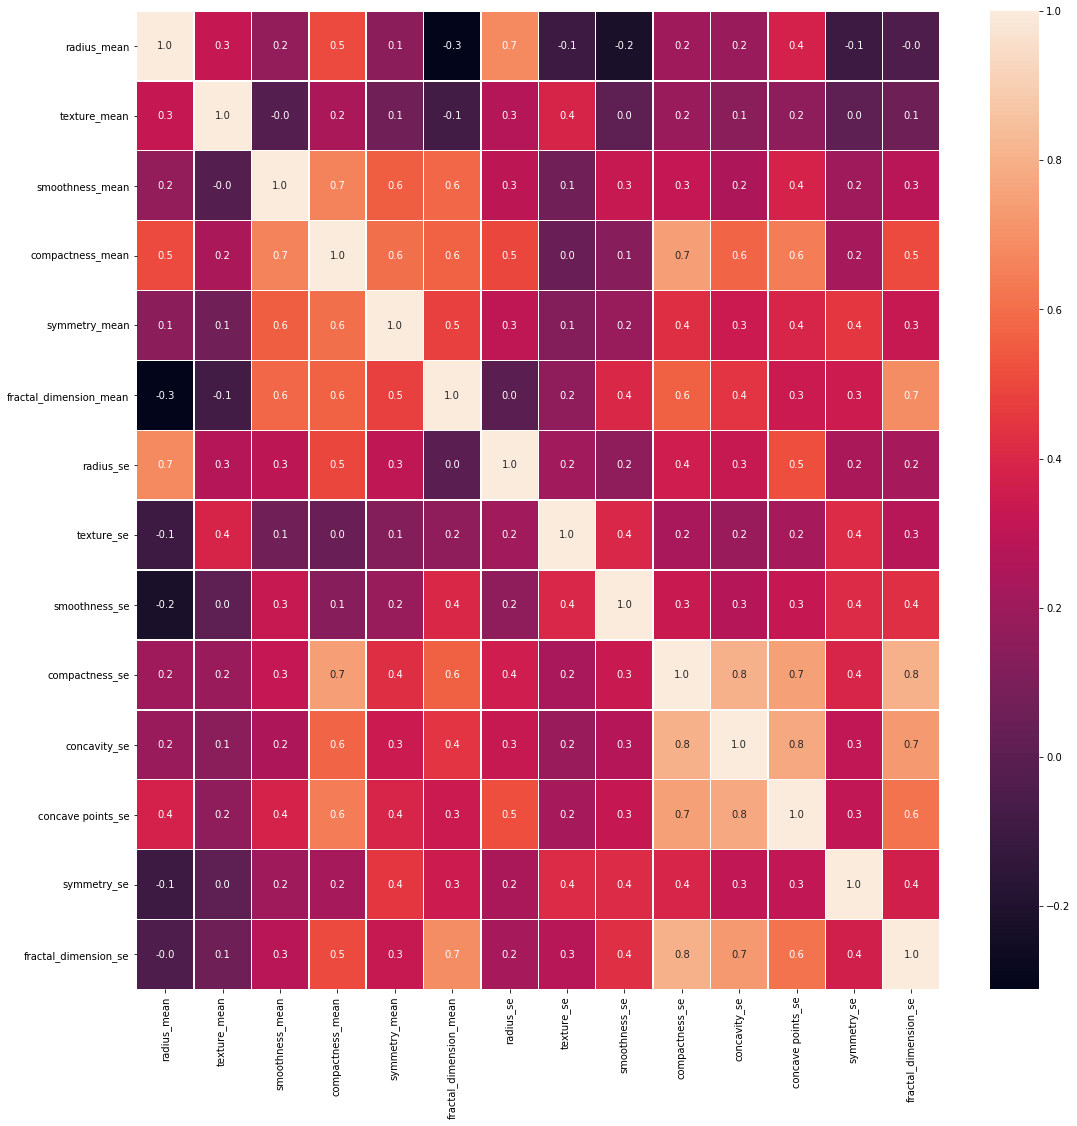

In [109]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<h3> Part - 1 Clustering</h3>

<p>
    In this part, we will use clustering methods (Kmeans, Kmedoids, etc.).
</p>

In [113]:
from sklearn.cluster import KMeans

##### Clustering with original dataset (not normalized)

In [114]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
clusters = kmeans.predict(X)

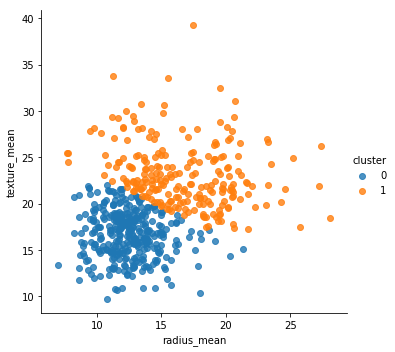

In [143]:
cluster_df = pd.concat((X, pd.Series(clusters, name="cluster")), axis=1)
sns.lmplot(data=cluster_df, x='radius_mean', y='texture_mean', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

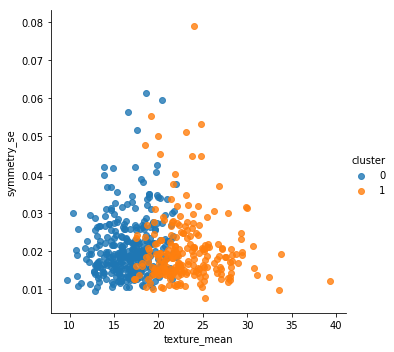

In [145]:
facet = sns.lmplot(data=cluster_df, x='texture_mean', y='symmetry_se', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

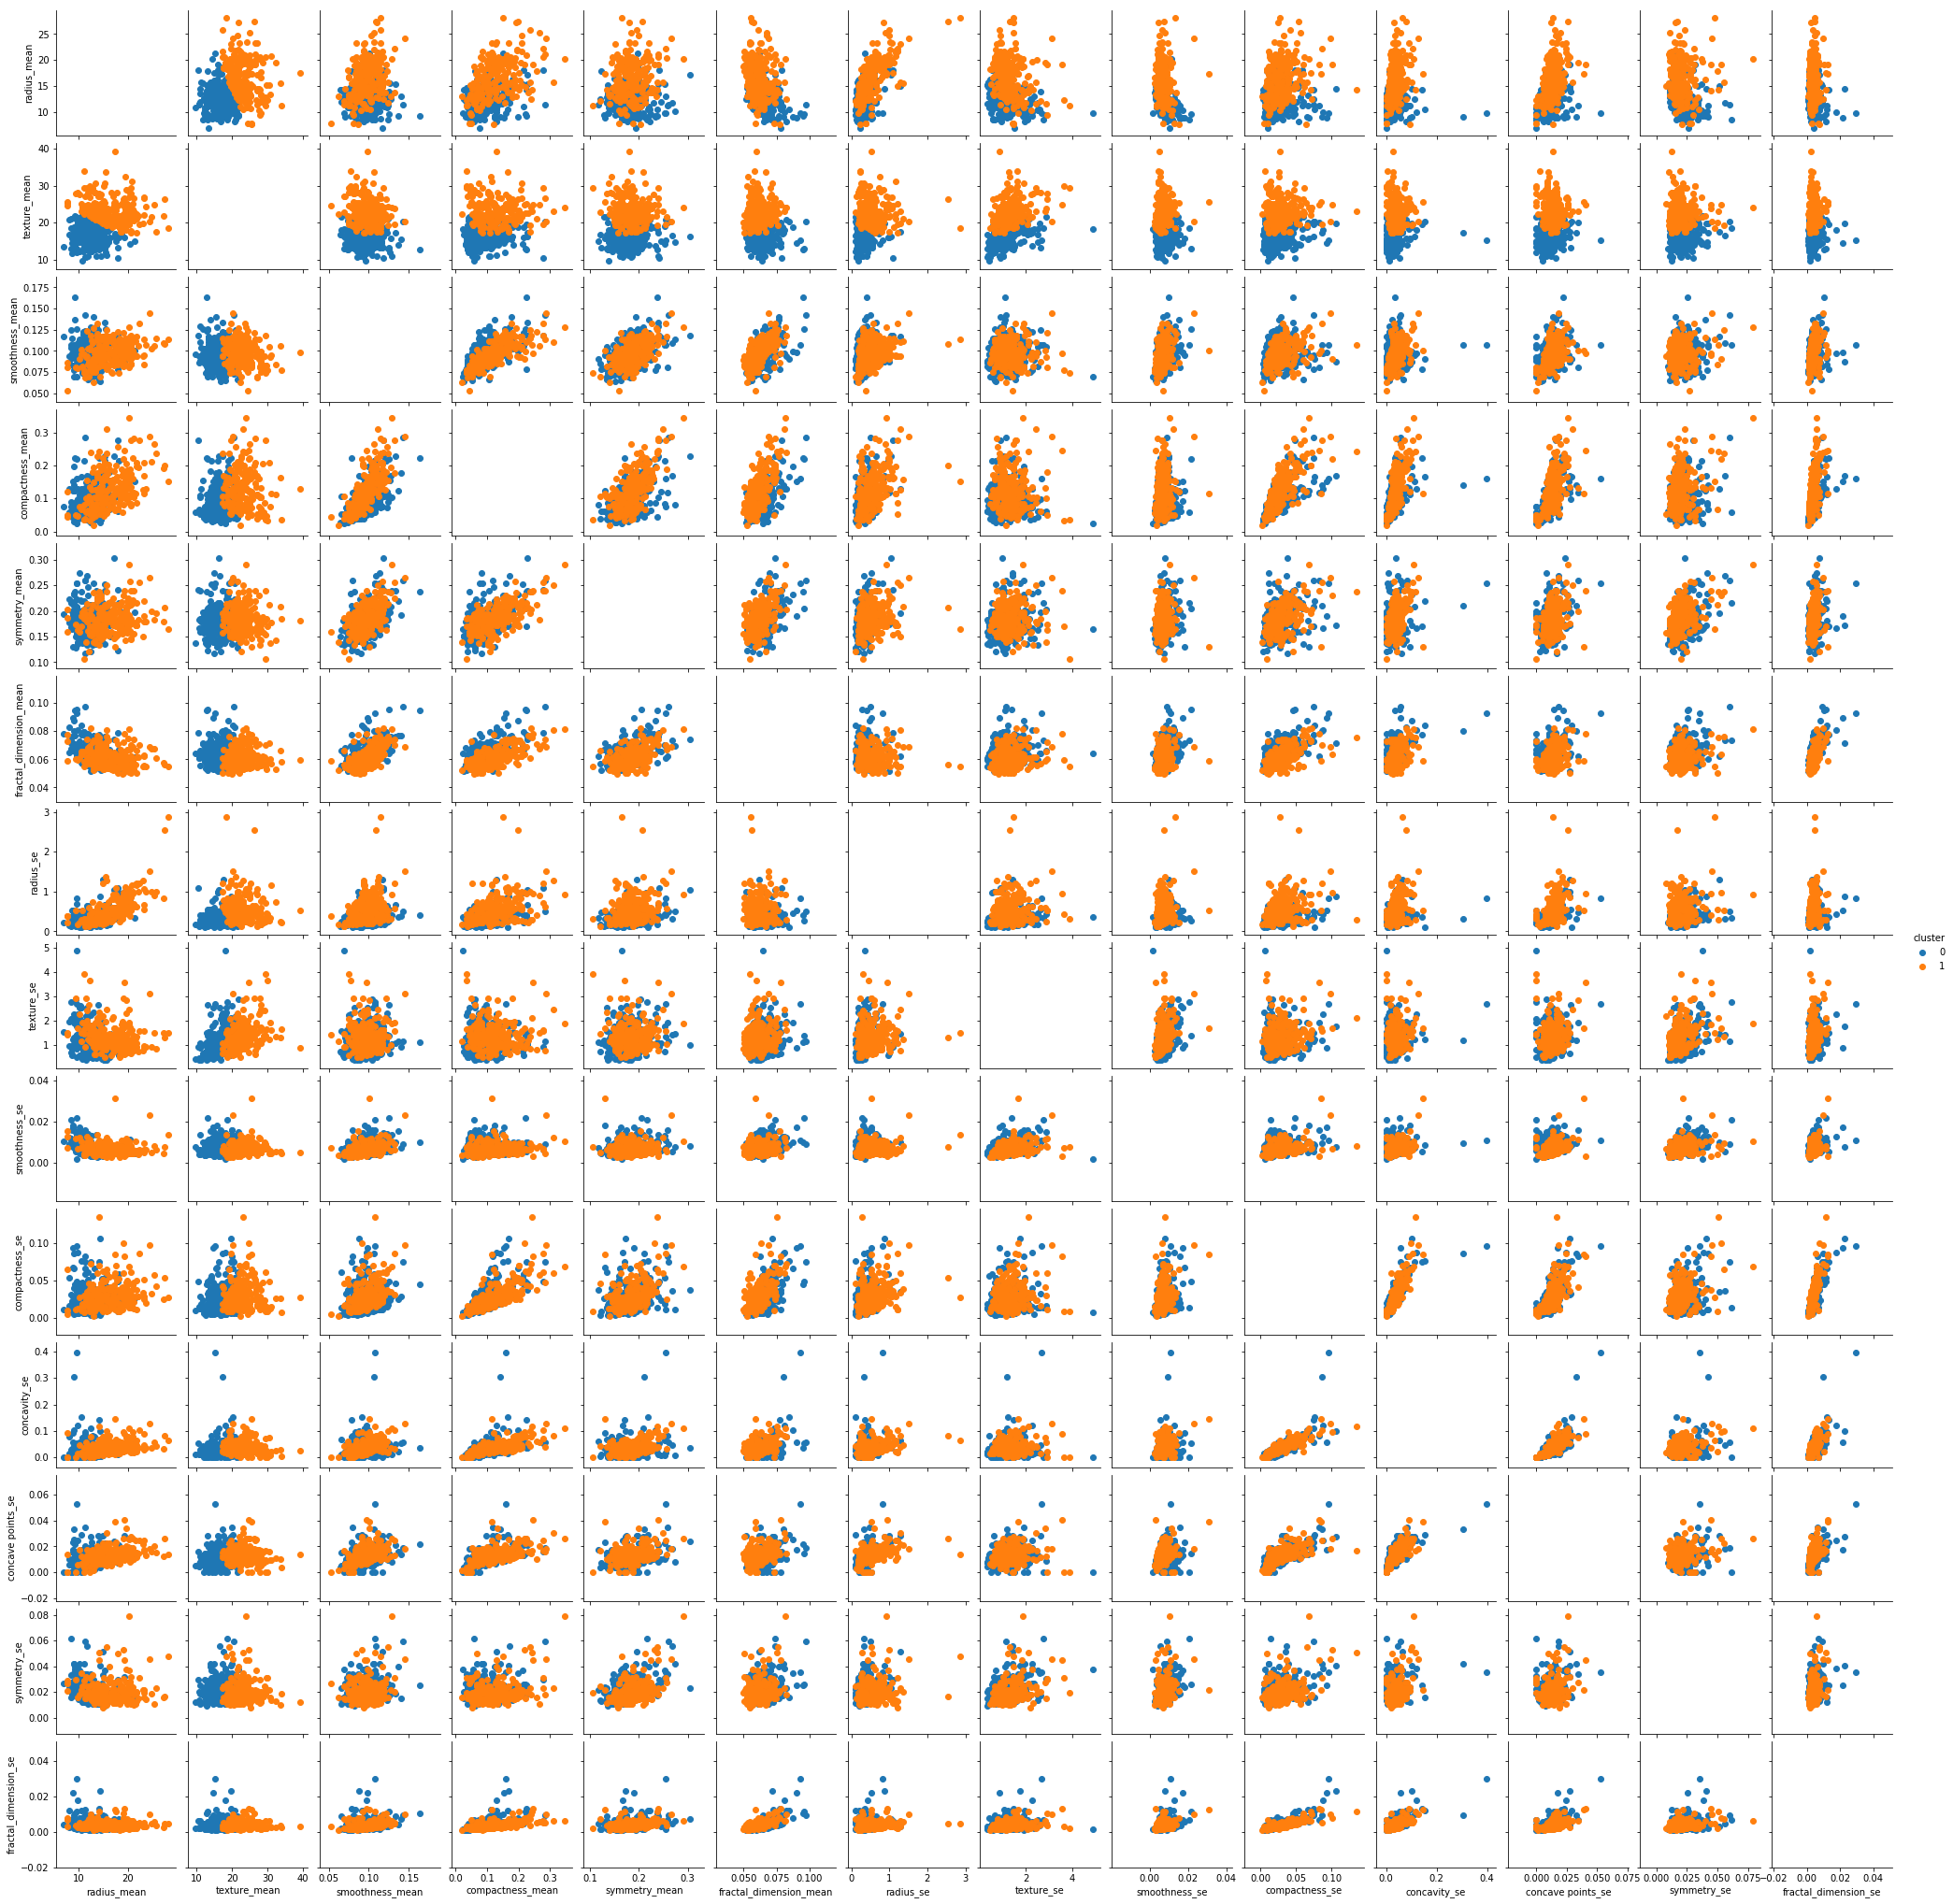

In [142]:
g = sns.PairGrid(cluster_df, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

##### Clustering with normalized dataset

In [152]:
kmeans_n = KMeans(n_clusters=2)
kmeans_n.fit(X_n)
clusters_n = kmeans.predict(X_n)

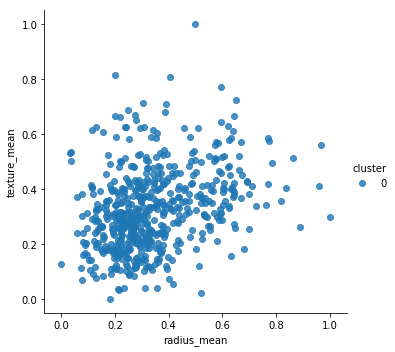

In [153]:
cluster_df_n = pd.concat((X_n, pd.Series(clusters_n, name="cluster")), axis=1)

sns.lmplot(data=cluster_df_n, x='radius_mean', y='texture_mean', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

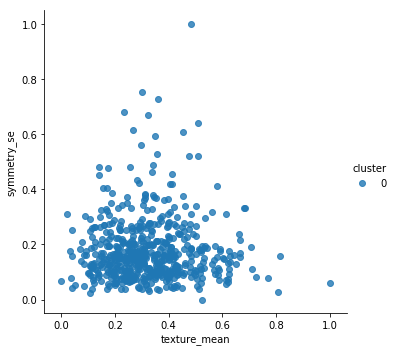

In [154]:
sns.lmplot(data=cluster_df_n, x='texture_mean', y='symmetry_se', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)
plt.show()

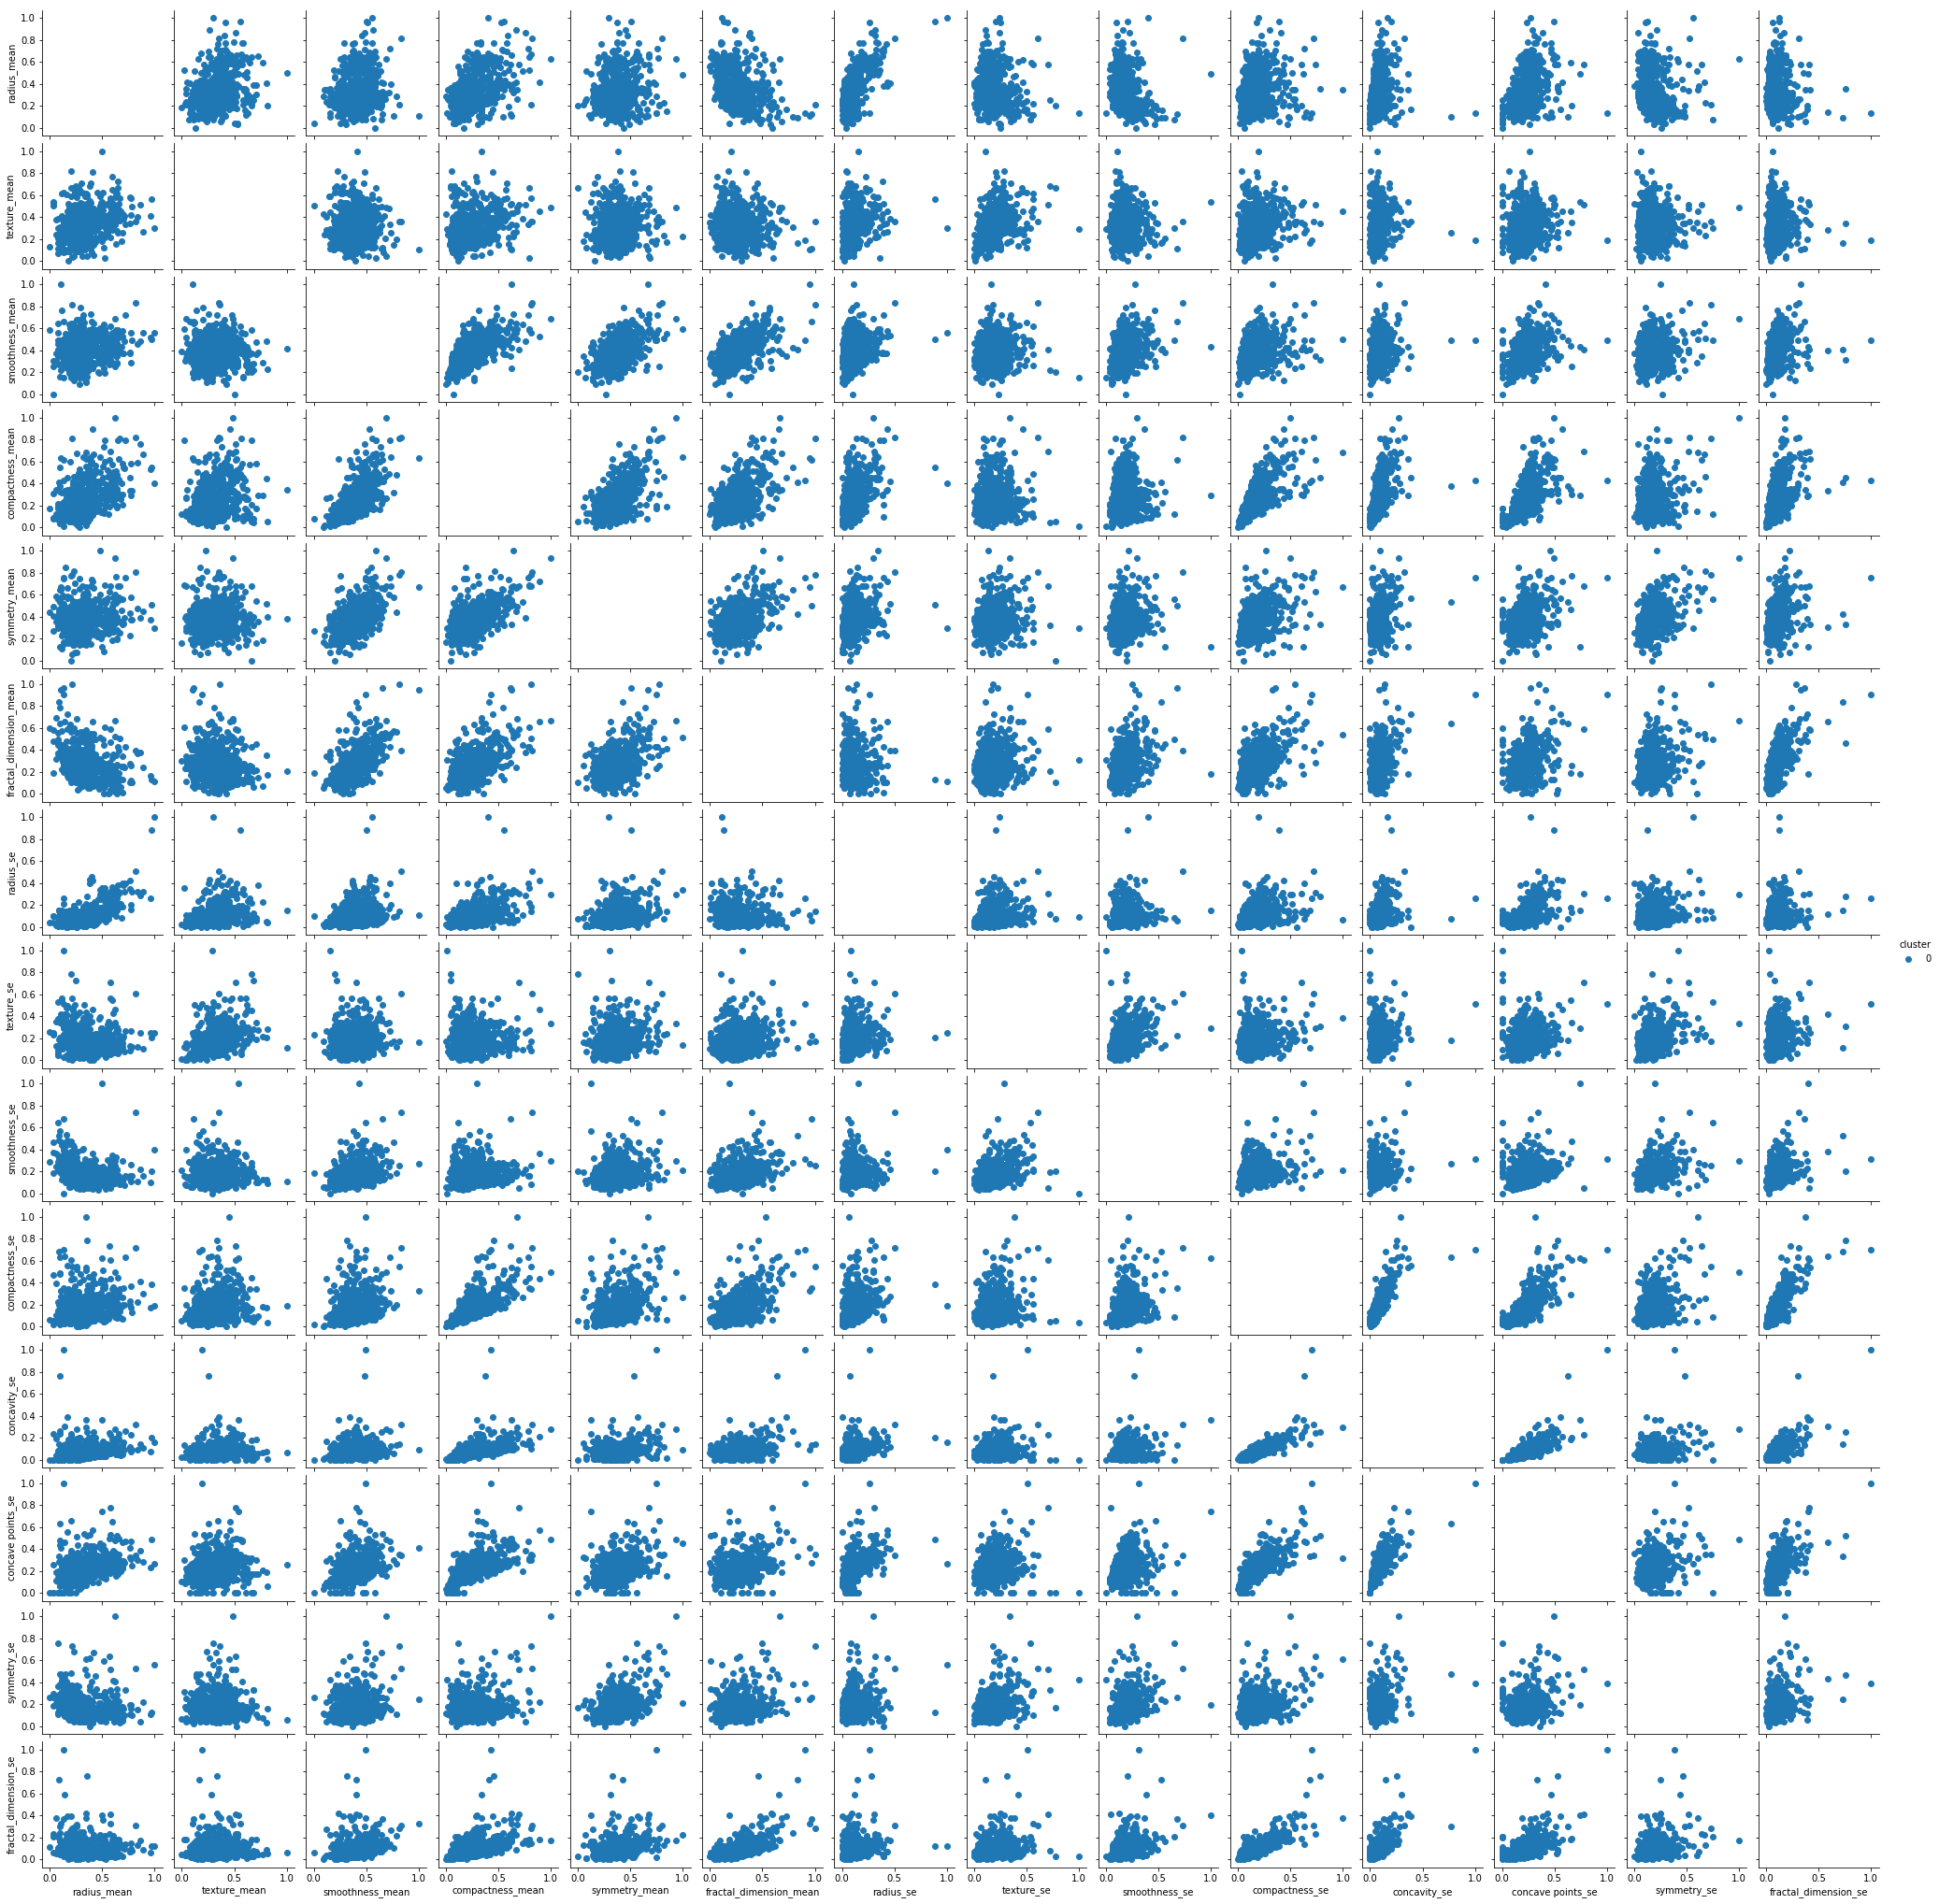

In [155]:
g = sns.PairGrid(cluster_df_n, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

#### Conclusion

As we see in plots, normalization did not work for clustering with K-means. We can clearly see clusters on plots without normalization but there is no cluster separation for normalized dataset

### Part 2 - Classification

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.20, random_state=9)

As a novice data scientist, I don't know which algorithm to choose. So I will train several algorithms and evaluate their performance and make my decision after that.

##### SVM (Support Vector Machine)

In [159]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [162]:
print('Accuracy of SVM classifier on training set: {:.4f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on training set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.9187
Accuracy of SVM classifier on training set: 0.8860


##### Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [164]:
print('Accuracy of SVM classifier on training set: {:.4f}'.format(nb.score(X_train, y_train)))
print('Accuracy of SVM classifier on training set: {:.4f}'.format(nb.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.9077
Accuracy of SVM classifier on training set: 0.8772


##### Decision Tree Classifier

In [165]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=9).fit(X_train, y_train)

In [166]:
print('Accuracy of SVM classifier on training set: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Accuracy of SVM classifier on training set: {:.4f}'.format(dtree.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.0000
Accuracy of SVM classifier on training set: 0.8860


##### Random Forest Classifier

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=9).fit(X_train, y_train)

In [168]:
print('Accuracy of SVM classifier on training set: {:.4f}'.format(rf.score(X_train, y_train)))
print('Accuracy of SVM classifier on training set: {:.4f}'.format(rf.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.9187
Accuracy of SVM classifier on training set: 0.8772


##### Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=9).fit(X_train, y_train)

In [171]:
print('Accuracy of SVM classifier on training set: {:.4f}'.format(lr.score(X_train, y_train)))
print('Accuracy of SVM classifier on training set: {:.4f}'.format(lr.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.8967
Accuracy of SVM classifier on training set: 0.9035
